In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


train_dir = "C:/calorie_dataset/train"
test_dir = "C:/calorie_dataset/test"
val_dir = "C:/calorie_dataset/val"


num_classes = len(os.listdir(train_dir))


train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='categorical',shuffle=True)

validation_generator = test_datagen.flow_from_directory(val_dir,target_size=(150, 150),batch_size=32,class_mode='categorical',shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=32,class_mode='categorical',shuffle=False)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // 32)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save the model
model.save("calories_model.h5")



Found 80000 images belonging to 80 classes.
Found 16000 images belonging to 80 classes.
Found 16000 images belonging to 80 classes.



Epoch 1/5


2500/2500 [==============================] - 1788s 714ms/step - loss: 4.0176 - accuracy: 0.0659 - val_loss: 3.6046 - val_accuracy: 0.1357
Epoch 2/5
2500/2500 [==============================] - 1092s 437ms/step - loss: 3.5362 - accuracy: 0.1494 - val_loss: 3.2285 - val_accuracy: 0.2124
Epoch 3/5
2500/2500 [==============================] - 1123s 449ms/step - loss: 3.2421 - accuracy: 0.2044 - val_loss: 3.0457 - val_accuracy: 0.2482
Epoch 4/5
2500/2500 [==============================] - 2004s 802ms/step - loss: 3.0573 - accuracy: 0.2426 - val_loss: 3.0339 - val_accuracy: 0.2602
Epoch 5/5
500/500 [==============================] - 102s 204ms/step - loss: 2.8288 - accuracy: 0.2952
Test Loss: 2.8287997245788574
Test Accuracy: 0.2952499985694885


C:\Users\suriya\anaconda3\envs\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 267ms/step


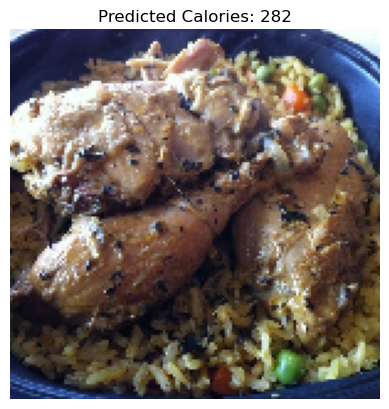

Image: C:\Users\suriya\OneDrive\Desktop\961396.jpg
Predicted Class: 1
Predicted Calories: 282
1/1 [==============================] - 0s 68ms/step


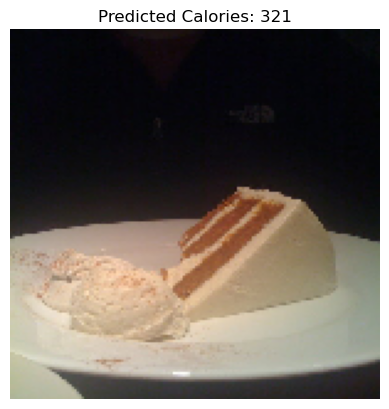

Image: C:\Users\suriya\OneDrive\Desktop\4161.jpg
Predicted Class: 15
Predicted Calories: 321
1/1 [==============================] - 0s 79ms/step


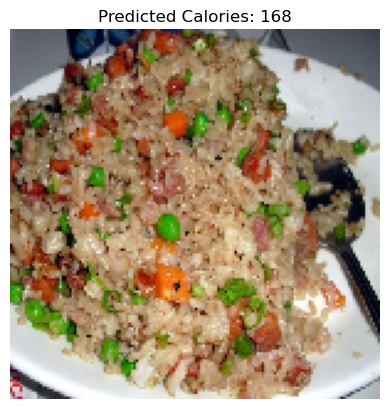

Image: C:\Users\suriya\OneDrive\Desktop\2608.jpg
Predicted Class: 39
Predicted Calories: 168
1/1 [==============================] - 0s 64ms/step


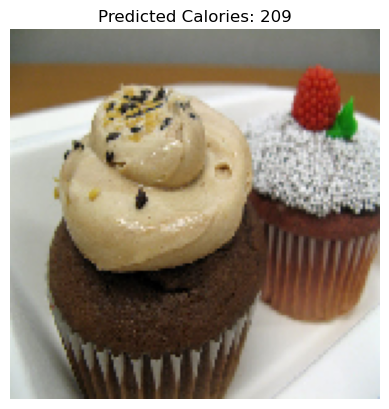

Image: C:\Users\suriya\OneDrive\Desktop\70625.jpg
Predicted Class: 20
Predicted Calories: 209
1/1 [==============================] - 0s 63ms/step


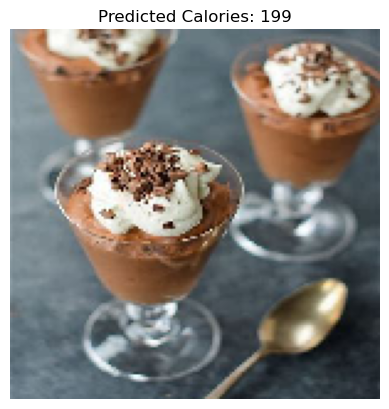

Image: C:\Users\suriya\OneDrive\Desktop\th.jpeg
Predicted Class: 58
Predicted Calories: 199
Total Calories: 1179


In [2]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("calories_model.h5")

# Define the mapping dictionary
class_mapping = {
    0: 265,   # bibimbap
    1: 282,   # ceviche
    2: 423,   # churros
    3: 229,   # beef_carpaccio
    4: 178,   # beef_tartare
    5: 25,    # beet_salad
    6: 370,   # beignets
    7: 210,   # bread_pudding
    8: 202,   # breakfast_burrito
    9: 70,    # bruschetta
    10: 200,  # caesar_salad
    11: 254,  # cannoli
    12: 355,  # caprese_salad
    13: 408,  # carrot_cake
    14: 416,  # cheese_plate
    15: 321,  # cheesecake
    16: 136,  # chicken_curry
    17: 306,  # chicken_quesadilla
    18: 203,  # chicken_wings
    19: 389,  # chocolate_cake
    20: 209,  # chocolate_mousse
    21: 220,  # club_sandwich
    22: 266,  # crab_cakes
    23: 236,  # creme_brulee
    24: 227,  # croque_madame
    25: 369,  # cup_cakes
    26: 201,  # deviled_eggs
    27: 412,  # donuts
    28: 112,  # dumplings
    29: 140,  # edamame
    30: 276,  # eggs_benedict
    31: 90,   # escargots
    32: 333,  # falafel
    33: 267,  # filet_mignon
    34: 212,  # fish_and_chips
    35: 312,  # french_fries
    36: 23,   # french_onion_soup
    37: 297,  # french_toast
    38: 125,  # fried_calamari
    39: 168,  # fried_rice
    40: 159,  # frozen_yogurt
    41: 350,  # garlic_bread
    42: 101,  # greek_salad
    43: 350,  # grilled_cheese_sandwich
    44: 206,  # grilled_salmon
    45: 295,  # hamburger
    46: 67,   # hot_and_sour_soup
    47: 290,  # hot_dog
    48: 161,  # huevos_rancheros
    49: 166,  # hummus
    50: 201,  # ice_cream
    51: 100,  # lobster_bisque
    52: 1060, # lobster_roll_sandwich
    53: 164,  # macaroni_and_cheese
    54: 380,  # macarons
    55: 35,   # miso_soup
    56: 154,  # omelette
    57: 411,  # onion_rings
    58: 199,  # oysters
    59: 170,  # pad_thai
    60: 277,  # pancakes
    61: 93,   # panna_cotta
    62: 410,  # peking_duck
    63: 67,   # pho
    64: 266,  # pizza
    65: 231,  # pork_chop
    66: 233,  # poutine
    67: 266,  # prime_rib
    68: 237,  # pulled_pork_sandwich
    69: 436,  # ramen
    70: 367,  # red_velvet_cake
    71: 308,  # samosa
    72: 70,   # seaweed_salad
    73: 120,  # shrimp_and_grits
    74: 112,  # spaghetti_bolognese
    75: 157,  # spaghetti_carbonara
    76: 154,  # spring_rolls
    77: 346,  # strawberry_shortcake
    78: 306,  # sushi
    79: 291   # waffles
}

def predict_calories(image_paths):
    total_calories = 0

    for image_path in image_paths:
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Make predictions
        predictions = model.predict(img_array)

        predicted_class = np.argmax(predictions)

        # Get the predicted class calorie count
        predicted_class_calories = class_mapping[predicted_class]

        # Add the predicted calorie count to the total
        total_calories += predicted_class_calories

        # Display the image and predicted calorie count
        plt.figure()
        plt.imshow(img)
        plt.title("Predicted Calories: {}".format(predicted_class_calories))
        plt.axis('off')
        plt.show()

        print("Image:", image_path)
        print("Predicted Class:", predicted_class)
        print("Predicted Calories:", predicted_class_calories)

    return total_calories

def main():
    # Example usage
    image_paths = [
        r"C:\Users\suriya\OneDrive\Desktop\961396.jpg",
        r"C:\Users\suriya\OneDrive\Desktop\4161.jpg",
        r"C:\Users\suriya\OneDrive\Desktop\2608.jpg",
        r"C:\Users\suriya\OneDrive\Desktop\70625.jpg",
        r"C:\Users\suriya\OneDrive\Desktop\th.jpeg"
    ]

    total_calories = predict_calories(image_paths)
    print("Total Calories:", total_calories)

    # Provide recommendations or warnings based on the total calorie intake
    if total_calories > 2000:
        print("Warning: Your total calorie intake is high. Consider reducing portion sizes.")
    elif total_calories < 1500:
        print("Warning: Your total calorie intake is low. Ensure you're consuming enough calories for your needs.")
    else:
        print("Your total calorie intake is within a healthy range.")

if __name__ == "__main__":
    main()
